# Load the h5 file
- Author: Rui Guo (KU Leuven), rui.guo1@kuleuven.be

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob
from PIL import Image
import pylib as py
import imlib as im

# Load all files in the folder

In [15]:
dataset_folder = 'I:/Segmentation/T17-T18/'

In [16]:
def read_h5df_names(folder, file_id=None):
    fileName_list = os.listdir(folder)
    if file_id == None:
        h5df_files = []
        files_num = len(fileName_list)
        for i in range(files_num):
            new_fileName_list = [fname[0:-3] for fname in fileName_list]
            files = glob.glob(os.path.join(folder+fileName_list[i]))
            h5df_files.append(files[0])
    else:
        h5df_files = glob.glob(os.path.join(folder+fileName_list[file_id]))
        # h5df_files = [fname for fname in files][file_id]
        new_fileName_list = [fileName_list[file_id][0:-3]]
    return h5df_files, new_fileName_list

In [17]:
h5df_files, new_fileName_list = read_h5df_names(dataset_folder)
h5df_files, new_fileName_list

(['I:/Segmentation/T17-T18/T700-T-17_10N_650nm_ffc_rec_standard.h5',
  'I:/Segmentation/T17-T18/T700-T-17_240N_650nm_ffc_rec_standard.h5',
  'I:/Segmentation/T17-T18/T700-T-17_320N_650nm_ffc_rec_standard.h5',
  'I:/Segmentation/T17-T18/T700-T-17_360N_650nm_ffc_rec_standard.h5',
  'I:/Segmentation/T17-T18/T700-T-17_380N_650nm_ffc_rec_standard.h5',
  'I:/Segmentation/T17-T18/T700-T-17_400N_650nm_ffc_rec_standard.h5',
  'I:/Segmentation/T17-T18/T700-T-17_80N_650nm_ffc_rec_standard.h5',
  'I:/Segmentation/T17-T18/T700-T-18_10N_650nm_ffc_rec_standard.h5',
  'I:/Segmentation/T17-T18/T700-T-18_154N_650nm_ffc_rec_standard.h5',
  'I:/Segmentation/T17-T18/T700-T-18_231N_650nm_ffc_rec_standard.h5',
  'I:/Segmentation/T17-T18/T700-T-18_308N_650nm_ffc_rec_standard.h5',
  'I:/Segmentation/T17-T18/T700-T-18_346N_650nm_ffc_rec_standard.h5',
  'I:/Segmentation/T17-T18/T700-T-18_366N_650nm_ffc_rec_standard.h5',
  'I:/Segmentation/T17-T18/T700-T-18_385N_650nm_ffc_rec_standard.h5',
  'I:/Segmentation/T17-

# Load the data

In [18]:
def load_fromH5PY(filename, dtype=np.float16):
    with h5py.File(filename, 'r') as hdf:
        data = hdf.get('data')
        data3D_arr = np.array(data, dtype=dtype)
    return data3D_arr

# Load each file and save them into images/h5 files

In [19]:
def normalize8(I):
    mn = I.min()
    mx = I.max()
    mx -= mn
    I = ((I - mn)/mx) * 255
    return I.astype(np.uint8)

In [20]:
def save_3Ddata(path, data3D, output_range=None):
    if isinstance(data3D, (list, tuple)):
        depth = len(data3D)
        height, width = data3D[0].shape
    else: 
        depth, height, width = data3D.shape
    
    if output_range == None:
        h_range = [0, height]
        w_range = [0, width]
    else:
        h_range, w_range = output_range
    if not os.path.exists(path):
        os.makedirs(path)
    # Save the 3D CT data into 2D slice image
    for i in range(depth):
        if isinstance(data3D, (list, tuple)):
            data2D_whole = data3D[i][h_range[0]:h_range[1], w_range[0]:w_range[1]]
        else:
            data2D_whole = data3D[i, h_range[0]:h_range[1], w_range[0]:w_range[1]]
        im = Image.fromarray(data2D_whole)
        im.save(path + '/slice_'+str(i).zfill(5)+'.tif')

In [21]:
# new_file_num = len(new_fileName_list)

# for i in range(new_file_num):
#     path_dir = py.join('I:/Segmentation_Crop', new_fileName_list[i])
#     py.mkdir(path_dir)
#     # Load data
#     data3D_arr = load_fromH5PY(h5df_files[i], dtype=np.float16)
#     data3D_arr_uint8 = normalize8(data3D_arr)
#     # Save data
#     ## 1. Images
#     path_dir_no_crop_img = py.join(path_dir, ('Image_No_Crop_'+new_fileName_list[i]))
#     py.mkdir(path_dir_no_crop_img)
#     save_3Ddata(path_dir_no_crop_img, data3D_arr_uint8, output_range=None)
#     path_dir_crop_img = py.join(path_dir, ('Image_Crop_h2100(400-2500)_w600(1000-1600)_'+new_fileName_list[i]))
#     py.mkdir(path_dir_crop_img)
#     save_3Ddata(path_dir_crop_img, data3D_arr_uint8, output_range=[[400,2500],[1000,1600]])
#     ## 2. H5 files
#     # This is to save the Uint8 data
#     crop_file_name = ('Crop_h2100(400-2500)_w600(1000-1600)_uint8_'+new_fileName_list[i]+'.h5')
#     with h5py.File(crop_file_name, 'w') as hdf:
#         data3D_arr_uint8 = data3D_arr_uint8[:,400:2500,1000:1600]
#         hdf.create_dataset('data', data=data3D_arr_uint8)

In [22]:
path_dir = py.join('I:/Segmentation_Crop', new_fileName_list[6])
path_dir

'I:/Segmentation_Crop\\T700-T-17_80N_650nm_ffc_rec_standard'

In [23]:
i = 6
path_dir = py.join('I:/Segmentation_Crop', new_fileName_list[i])
py.mkdir(path_dir)
print(path_dir)
# Load data
data3D_arr = load_fromH5PY(h5df_files[i], dtype=np.float16)
data3D_arr_uint8 = normalize8(data3D_arr)
# Save data
## 1. Images
# path_dir_no_crop_img = py.join(path_dir, ('Image_No_Crop_'+new_fileName_list[i]))
# py.mkdir(path_dir_no_crop_img)
# save_3Ddata(path_dir_no_crop_img, data3D_arr_uint8, output_range=None)
path_dir_crop_img = py.join(path_dir, ('Image_Crop_h2000(100-2100)_w600(1200-1800)_'+new_fileName_list[i]))
py.mkdir(path_dir_crop_img)
save_3Ddata(path_dir_crop_img, data3D_arr_uint8, output_range=[[100,2100],[1200,1800]])
## 2. H5 files
# This is to save the Uint8 data
crop_file_name = ('Crop_h2000(100-2100)_w600(1200-1800)_uint8_'+new_fileName_list[i]+'.h5')
with h5py.File(crop_file_name, 'w') as hdf:
    data3D_arr_uint8 = data3D_arr_uint8[:,100:2100,1200:1800]
    hdf.create_dataset('data', data=data3D_arr_uint8)

I:/Segmentation_Crop\T700-T-17_80N_650nm_ffc_rec_standard


(2560, 2560)
176
69
uint8


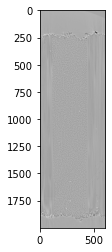

In [13]:
import imageio
dataset_folder =  'I:/Segmentation_Crop/T700-T-17_80N_650nm_ffc_rec_standard/Image_No_Crop_T700-T-17_80N_650nm_ffc_rec_standard/'
dataset_name = 'slice_00000.tif'
dataset_file = py.join(dataset_folder, dataset_name)
origData = np.array(imageio.imread(dataset_file))
print(origData.shape)
print(np.max(origData))
print(np.min(origData))
print((origData.dtype))

plt.figure()
plt.imshow(origData[100:2100,1200:1800]/255, cmap='gray')
plt.show()